<a href="https://colab.research.google.com/github/mralamdari/CV-Object-Detection-Projects/blob/main/Flower_Recognition_Challenges_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import cv2
import copy
import time
import tqdm
import warnings
import matplotlib
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing

In [8]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

#Tensorflow

##Data

###1.Get Data

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip \*.zip && rm *.zip

In [ ]:
path_folder = '/content/flowers'

size = 224
data = []
label = []
data_names = []
id = 0
for folder in tqdm.tqdm(os.listdir(path_folder)):
  for files in tqdm.tqdm(os.listdir(os.path.join(path_folder, folder))):
    if files.endswith('jpg'):
      label.append(folder)
      img_path = os.path.join(path_folder, folder, files)
      data_names.append((id, img_path))
      img = cv2.imread(img_path, cv2.IMREAD_COLOR)
      im = cv2.resize(img, (size, size))
      data.append(im)
      id += 1

In [21]:
data = np.array(data)/255
label = np.array(label)

In [17]:
data.shape

(4317, 224, 224, 3)

In [18]:
label.shape

(4317,)

In [20]:
len(data_names)

4317

###2.Preprocess Data

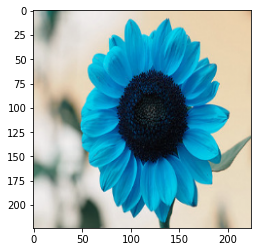

In [22]:
plt.imshow(data[0])

In [23]:
def plot_img(id):
  img_label = label[id]
  img = data[id]
  plt.imshow(img)
  plt.title(img_label)  

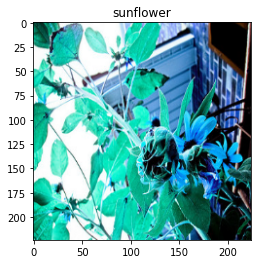

In [26]:
rnd = np.random.randint(0, len(data))
plot_img(rnd)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center= False,
                              samplewise_center= False,
                              featurewise_std_normalization= False,
                              samplewise_std_normalization=False,
                              rotation_range= 10,        # 0- 180
                              zca_whitening=False,
                              zoom_range=0.1,            # Randomly zoom image
                              width_shift_range=0.2,     # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.2,    # randomly shift images vertically (fraction of total height)
                              horizontal_flip=True,      # randomly flip images
                              vertical_flip=False)       # randomly flip images
                             
datagen.fit(X_train)


History = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Base_model = VGG16(include_top= False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

model = Sequential()
model.add(Base_model)
model.add(Dense(256,activation='relu'))
# adding prediction(softmax) layer
model.add(Dense(5,activation="softmax"))

Base_model.trainable = False



In [ ]:
val_pred = my_model.predict(x_test)
predicted = np.argmax(val_pred, axis=1)

plt.figure(figsize=(8,8))

actual = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(actual, predicted)
sns.heatmap(conf_mat, annot=True, fmt="d", cbar = False,  cmap = plt.cm.Blues)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(actual, predicted, target_names = CLASSES))

# PyTorch

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )

image_size = 224
batch_size = 10
train_generator = data_generator.flow_from_directory(
        '../input/flowers-recognition/flowers/flowers/',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
count = sum([len(files) for r, d, files in os.walk("../input/flowers-recognition/flowers/flowers/")])

model.fit_generator(
        train_generator,
        steps_per_epoch=int(count/batch_size) + 1,
        epochs=10)